<a href="https://colab.research.google.com/github/aqsabrekhna/Machine-learning-Training/blob/main/Clustering_Preparation_and_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [11]:
import pandas as pd

# Load the Mall Customer dataset
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)


In [14]:
from sklearn.metrics import silhouette_score

inertia = kmeans.inertia_
sil_score = silhouette_score(X_scaled, labels)

print(f'K = {k} | Inertia (WCSS): {inertia:.2f}')
print(f'K = {k} | Silhouette Score: {sil_score:.3f}')


K = 3 | Inertia (WCSS): 157.70
K = 3 | Silhouette Score: 0.467


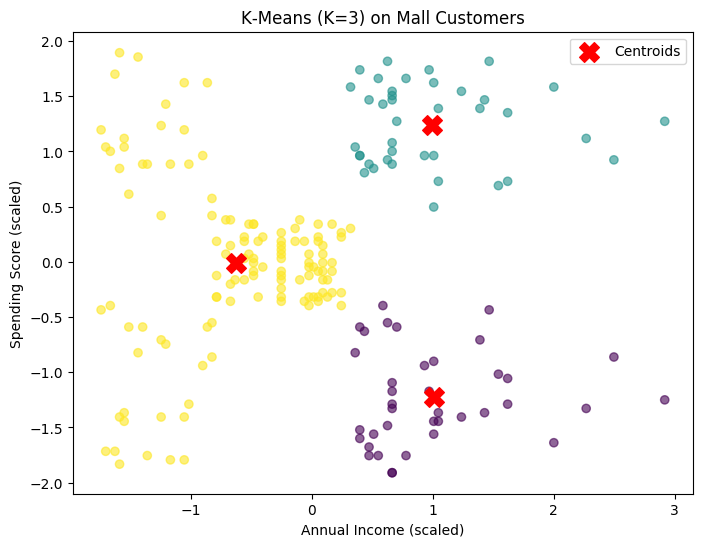

In [15]:
import matplotlib.pyplot as plt

# Get centroids (scaled)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_scaled[:,0],
    X_scaled[:,1],
    c=labels,
    cmap='viridis',
    alpha=0.6
)

# Plot centroids
plt.scatter(
    centroids[:,0],
    centroids[:,1],
    s=200,
    c='red',
    marker='X',
    label='Centroids'
)

plt.title(f'K‑Means (K={k}) on Mall Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


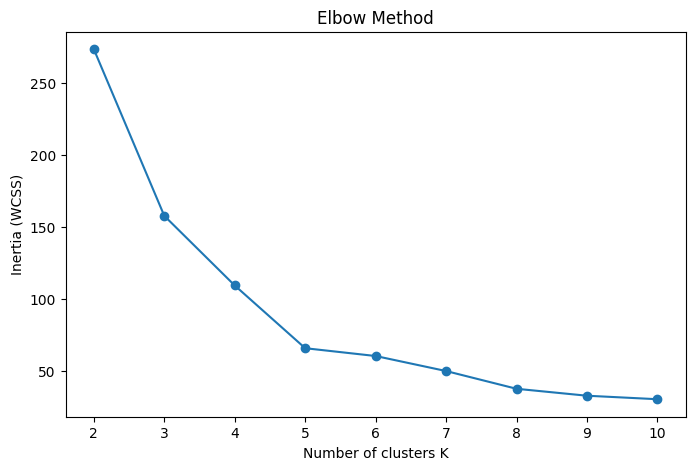

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(2, 11)  # K values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia (WCSS)')
plt.xticks(K_range)
plt.show()


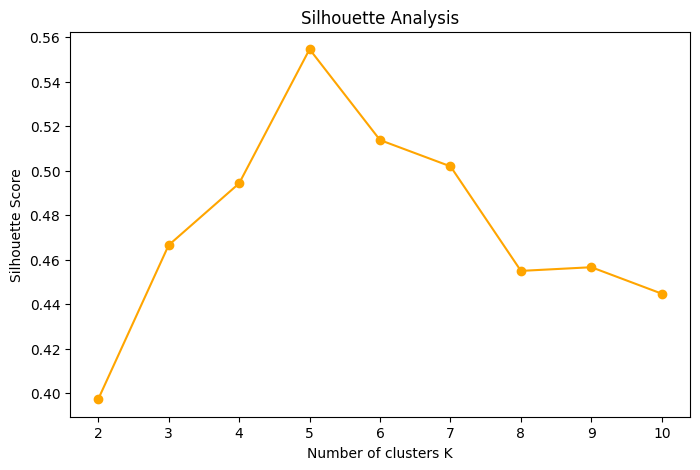

In [17]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.show()


In [18]:
optimal_k = 5
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
labels_opt = kmeans_opt.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = labels_opt

# Centroids
centroids = kmeans_opt.cluster_centers_


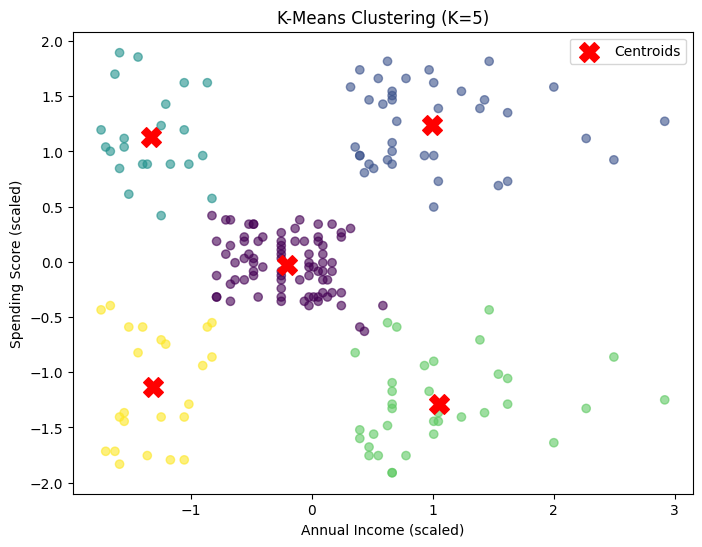

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_opt, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


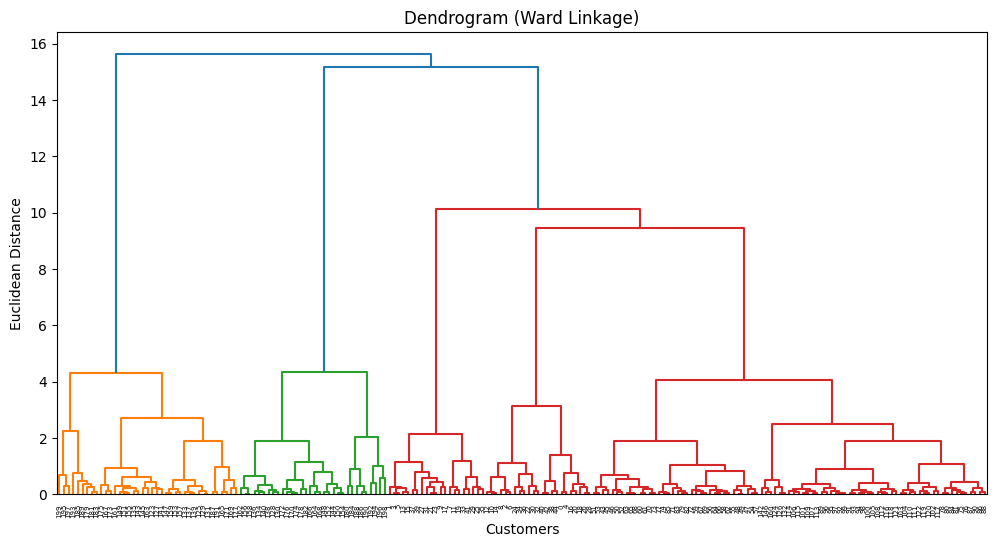

In [20]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Compute the linkage matrix using Ward linkage
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


In [22]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5
hac = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
hac_labels = hac.fit_predict(X_scaled)

# Add HAC cluster labels to the dataframe
df['HAC_Cluster'] = hac_labels

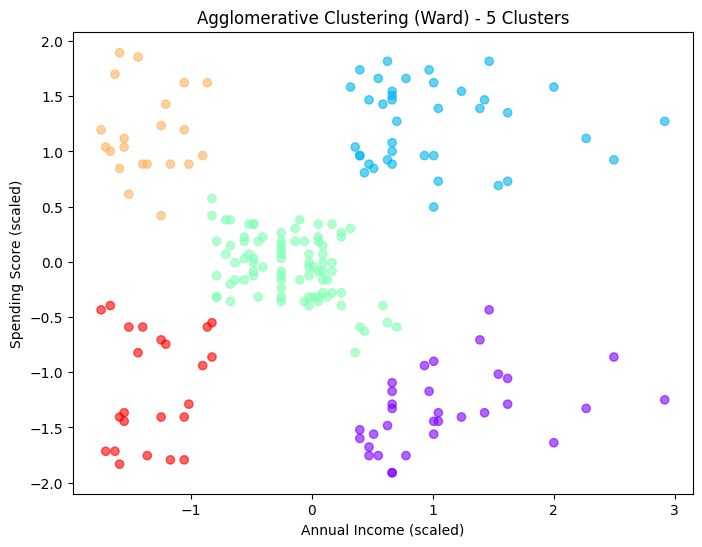

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=hac_labels, cmap='rainbow', alpha=0.6)
plt.title(f'Agglomerative Clustering (Ward) - {n_clusters} Clusters')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()
